In [1]:
# Can we load and propigate solar system objects with skuyfield rather than open orb?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import skyfield

from skyfield.api import load
from skyfield.data import mpc

In [2]:
with load.open('CometEls.txt') as f:
    comets = mpc.load_comets_dataframe(f)


In [3]:
comets

,perihelion_year,perihelion_month,perihelion_day,perihelion_distance_au,eccentricity,argument_of_perihelion_degrees,longitude_of_ascending_node_degrees,inclination_degrees,magnitude_g,magnitude_k,designation,reference
0,1997,3,29.5659,0.889875,0.994969,130.4086,282.5551,89.3730,-2.0,4.0,C/1995 O1 (Hale-Bopp),MPEC 2022-S20
1,2026,6,14.6839,2.586989,0.314606,333.4132,40.0086,2.6010,11.5,4.0,P/1996 R2 (Lagerkvist),NK 1615
2,2027,9,6.3498,3.423897,0.243306,244.6480,159.0373,5.0265,13.0,2.0,P/1998 VS24 (LINEAR),MPC 75703
3,2025,10,29.8148,1.122018,0.672538,231.3118,137.8643,7.5649,20.0,2.0,P/1999 RO28 (LONEOS),NK 731
4,2025,12,22.9457,3.299357,0.210489,161.6708,285.2965,5.0299,13.5,2.0,P/1999 XN120 (Catalina),MPC 75704
...,...,...,...,...,...,...,...,...,...,...,...,...
972,2027,1,17.3998,5.497631,0.310432,21.0980,124.8563,10.5518,6.5,4.0,450P/LONEOS,MPEC 2022-TA6
973,2022,11,27.5345,2.798526,0.558470,186.6969,300.9123,26.4827,13.5,4.0,451P/Christensen,MPEC 2023-BF4
974,2023,4,25.7021,4.178160,0.427183,37.0548,123.7001,6.4226,9.0,4.0,452P/Sheppard-Jewitt,MPEC 2023-BF4
975,2017,9,9.4886,0.255240,1.199252,241.6845,24.5997,122.6778,23.0,2.0,1I/`Oumuamua,MPC107687


In [4]:
mpc.MPCORB_URL

'https://www.minorplanetcenter.net/iau/MPCORB/MPCORB.DAT.gz'

In [5]:
with load.open('MPCORB.excerpt.DAT') as f:
    minor_planets = mpc.load_mpcorb_dataframe(f)

print(minor_planets.shape[0], 'minor planets loaded')

4 minor planets loaded


In [6]:
minor_planets

,designation_packed,magnitude_H,magnitude_G,epoch_packed,mean_anomaly_degrees,argument_of_perihelion_degrees,longitude_of_ascending_node_degrees,inclination_degrees,eccentricity,mean_daily_motion_degrees,...,observations,oppositions,observation_period,rms_residual_arcseconds,coarse_perturbers,precise_perturbers,computer_name,hex_flags,designation,last_observation_date
0,00001,3.33,0.15,K232P,17.21569,73.47045,80.26013,10.58634,0.078817,0.214115,...,7258,123,1801-2022,0.65,M-v,30l,MPCLINUX,0000,(1) Ceres,20220916
1,00002,4.12,0.15,K232P,357.84943,310.86479,172.91814,34.92704,0.230084,0.213831,...,8824,120,1804-2022,0.59,M-c,28k,MPCLINUX,0000,(2) Pallas,20221006
2,00003,5.15,0.15,K232P,351.82413,247.73655,169.84298,12.99067,0.256468,0.225894,...,7445,113,1804-2022,0.63,M-v,3Ek,MPCLINUX,0000,(3) Juno,20221226
3,00004,3.22,0.15,K232P,115.13301,151.59911,103.75733,7.13926,0.088758,0.271330,...,7537,108,1821-2022,0.63,M-p,18k,MPCLINUX,0000,(4) Vesta,20221226


In [7]:
from skyfield.constants import GM_SUN_Pitjeva_2005_km3_s2 as GM_SUN

ts = load.timescale()
eph = load('de421.bsp')
sun, earth = eph['sun'], eph['earth']


In [8]:
t = ts.utc(2026, 5, 31)


In [9]:
row = minor_planets.iloc[0]
row

designation_packed                         00001
magnitude_H                                 3.33
magnitude_G                                 0.15
epoch_packed                               K232P
mean_anomaly_degrees                    17.21569
argument_of_perihelion_degrees          73.47045
longitude_of_ascending_node_degrees     80.26013
inclination_degrees                     10.58634
eccentricity                            0.078817
mean_daily_motion_degrees               0.214115
semimajor_axis_au                       2.767182
uncertainty                                    0
reference                              MPO719049
observations                                7258
oppositions                                  123
observation_period                     1801-2022
rms_residual_arcseconds                     0.65
coarse_perturbers                            M-v
precise_perturbers                           30l
computer_name                           MPCLINUX
hex_flags           

In [10]:
ceres = sun + mpc.mpcorb_orbit(row, ts, GM_SUN)
ra, dec, distance = earth.at(t).observe(ceres).radec()
print(ra)
print(dec)

03h 55m 56.54s
+17deg 14' 47.5"


In [11]:
# Let's try loading up one of our things and naming things approp
gran = pd.read_csv('/Users/yoachim/rubin_sim_data/orbits/granvik_5k.txt', sep=' ')

In [12]:
gran

,a,e,inc,Omega,argPeri,meanAnomaly,epoch,H,MOID,objId,g,sed_filename
0,1.810322,0.457012,8.524691,321.309082,218.878296,194.936127,59853.0,24.902994,0.031219,242880,0.15,S.dat
1,1.390497,0.458398,43.303799,232.109802,241.479919,91.117035,59853.0,24.474217,0.121781,175331,0.15,S.dat
2,1.657430,0.493258,5.164651,302.836609,266.812195,161.882599,59853.0,23.124664,0.006973,647396,0.15,S.dat
3,2.073438,0.554929,10.493196,185.436066,139.102676,261.443756,59853.0,24.706829,0.085103,492747,0.15,S.dat
4,1.338621,0.133787,39.041023,341.855743,186.264435,40.988487,59853.0,24.607513,0.168620,546031,0.15,S.dat
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.624333,0.446512,54.509521,355.366943,314.864990,99.870674,59853.0,23.640100,0.114199,23696,0.15,S.dat
4996,2.984417,0.763269,41.823479,333.647278,74.136383,7.006821,59853.0,24.729494,0.234624,33632,0.15,C.dat
4997,1.787739,0.404088,23.665245,351.980927,102.490379,126.487000,59853.0,24.963896,0.084646,214385,0.15,S.dat
4998,2.174124,0.421286,4.020179,38.037006,138.996429,290.406464,59853.0,24.503445,0.267403,106108,0.15,S.dat


In [13]:
# let's try renaming some rows
gran2 = gran.rename(columns={'a': 'semimajor_axis_au', 'e': 'eccentricity', 'inc': 'inclination_degrees',
            'Omega': 'longitude_of_ascending_node_degrees', 'argPeri': 'argument_of_perihelion_degrees',
            'meanAnomaly': 'mean_anomaly_degrees', 'epoch': 'epoch_packed'})

In [14]:
gran2

,semimajor_axis_au,eccentricity,inclination_degrees,longitude_of_ascending_node_degrees,argument_of_perihelion_degrees,mean_anomaly_degrees,epoch_packed,H,MOID,objId,g,sed_filename
0,1.810322,0.457012,8.524691,321.309082,218.878296,194.936127,59853.0,24.902994,0.031219,242880,0.15,S.dat
1,1.390497,0.458398,43.303799,232.109802,241.479919,91.117035,59853.0,24.474217,0.121781,175331,0.15,S.dat
2,1.657430,0.493258,5.164651,302.836609,266.812195,161.882599,59853.0,23.124664,0.006973,647396,0.15,S.dat
3,2.073438,0.554929,10.493196,185.436066,139.102676,261.443756,59853.0,24.706829,0.085103,492747,0.15,S.dat
4,1.338621,0.133787,39.041023,341.855743,186.264435,40.988487,59853.0,24.607513,0.168620,546031,0.15,S.dat
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.624333,0.446512,54.509521,355.366943,314.864990,99.870674,59853.0,23.640100,0.114199,23696,0.15,S.dat
4996,2.984417,0.763269,41.823479,333.647278,74.136383,7.006821,59853.0,24.729494,0.234624,33632,0.15,C.dat
4997,1.787739,0.404088,23.665245,351.980927,102.490379,126.487000,59853.0,24.963896,0.084646,214385,0.15,S.dat
4998,2.174124,0.421286,4.020179,38.037006,138.996429,290.406464,59853.0,24.503445,0.267403,106108,0.15,S.dat


In [15]:
row = gran2.iloc[0]

# no idea what this is for, let's just put in something that should work
row['epoch_packed'] = 'K232P'
row['designation'] = 'poop1'

/var/folders/jv/jdhmc2t93njct5cx375mztcr0000gn/T/ipykernel_47253/2840622446.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['epoch_packed'] = 'K232P'
/var/folders/jv/jdhmc2t93njct5cx375mztcr0000gn/T/ipykernel_47253/2840622446.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['designation'] = 'poop1'
/var/folders/jv/jdhmc2t93njct5cx375mztcr0000gn/T/ipykernel_47253/2840622446.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [16]:
obj = sun + mpc.mpcorb_orbit(row, ts, GM_SUN)
ra, dec, distance = earth.at(t).observe(obj).radec()
print(ra)
print(dec)

05h 10m 10.23s
+27deg 12' 26.3"


In [17]:
help(ts.utc)

Help on method utc in module skyfield.timelib:

utc(year, month=1, day=1, hour=0, minute=0, second=0.0) method of skyfield.timelib.Timescale instance
    Build a `Time` from a UTC `calendar date`.
    
    .. versionadded:: 1.24
       Passing a Python ``datetime`` or a list of datetimes as the
       first argument has been deprecated (and was never supported
       for the other time scale methods).  Instead, use the methods
       :meth:`~skyfield.timelib.Timescale.from_datetime()` and
       :meth:`~skyfield.timelib.Timescale.from_datetimes()`.



In [18]:
t = ts.utc(2026, 5, range(3650))


In [19]:
ra, dec, distance = earth.at(t).observe(obj).radec()
print(ra)
print(dec)

3650 values from 03h 42m 43.96s to 05h 37m 35.46s
3650 values from +25deg 03' 28.1" to +24deg 52' 27.5"


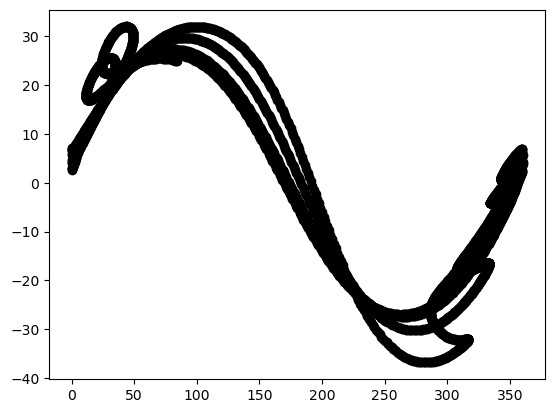

In [20]:
plt.plot(ra._degrees, dec.degrees, 'ko')

In [39]:
# Let's go to mjd
from astropy.time import Time
apt = Time(t.utc_iso(), scale='utc')

In [21]:
ra._degrees

array([55.68318007, 56.32478674, 56.97047437, ..., 82.62366127,
       83.50801591, 84.39772943])

In [ ]:
# ok, let's try the same thing with oorb, see how it looks
from rubin_sim.moving_objects import PyOrbEphemerides

In [ ]:
oo = PyOrbEphemerides()

eph_times = oo._convert_times(apt.mjd)

In [ ]:
oo._convert_to_oorb_elem(gran.iloc[0], format='KEP')

In [ ]:
two_body_ephems = oo.generate_ephemerides(eph_times, '2body')
n_body_ephems = oo.generate_ephemerides(eph_times, 'nbody')